## Exploratory Data Analysis on Air Quality in California
#### Mackenzie Dowling,  Artem Lukinov,  Q Ghaemi

---

## Table of Content

- **[TimeSeries Data Cleaning](#4)**
- **[Yearly AQI averages across California](#1)**
- **[Monthly AQI averages across California](#2)**
- **[2019 AQI Trend](#3)**
- **[AQI Geo Heatmap by County](#6)**

<a id="4"></a>
# Data Cleaning

In [1]:
#Imoprts:
import pandas as pd
from datetime import timedelta
%matplotlib inline
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#Reading in data
df = pd.read_csv('./Datasets/cleaned_df.csv')

In [3]:
#Viewing Dataframe:
df.head()

,date,state_name,county_name,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
0,2013-01-01,California,Alameda,1,62,Moderate,PM2.5,06-001-0007,4
1,2013-01-02,California,Alameda,1,61,Moderate,PM2.5,06-001-0007,4
2,2013-01-03,California,Alameda,1,81,Moderate,PM2.5,06-001-0007,4
3,2013-01-04,California,Alameda,1,78,Moderate,PM2.5,06-001-0007,4
4,2013-01-05,California,Alameda,1,84,Moderate,PM2.5,06-001-0007,4


In [4]:
# Change date column to be datetime dtype
df['date'] = pd.to_datetime(df['date'])

In [5]:
#Creating a copy of date column to set as index. 
#The purpose of makeing a copy of this is for EDA exploratory analysis.
df['date_index'] = df['date']
df['date_index'] = pd.to_datetime(df['date_index'])
df.set_index('date_index', inplace=True)
df.sort_index(inplace=True)

In [6]:
df.head()

,date,state_name,county_name,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date_index,,,,,,,,,
2009-01-01,2009-01-01,California,Fresno,19,104,Unhealthy for Sensitive Groups,PM2.5,06-019-0008,7
2009-01-01,2009-01-01,California,Mendocino,45,20,Good,Ozone,06-045-0008,1
2009-01-01,2009-01-01,California,Mono,51,56,Moderate,PM10,06-051-0001,3
2009-01-01,2009-01-01,California,Inyo,27,53,Moderate,PM10,06-027-1003,14
2009-01-01,2009-01-01,California,Orange,59,156,Unhealthy,PM2.5,06-059-0007,4


<a id="1"></a>

# AQI Yearly Trend in California


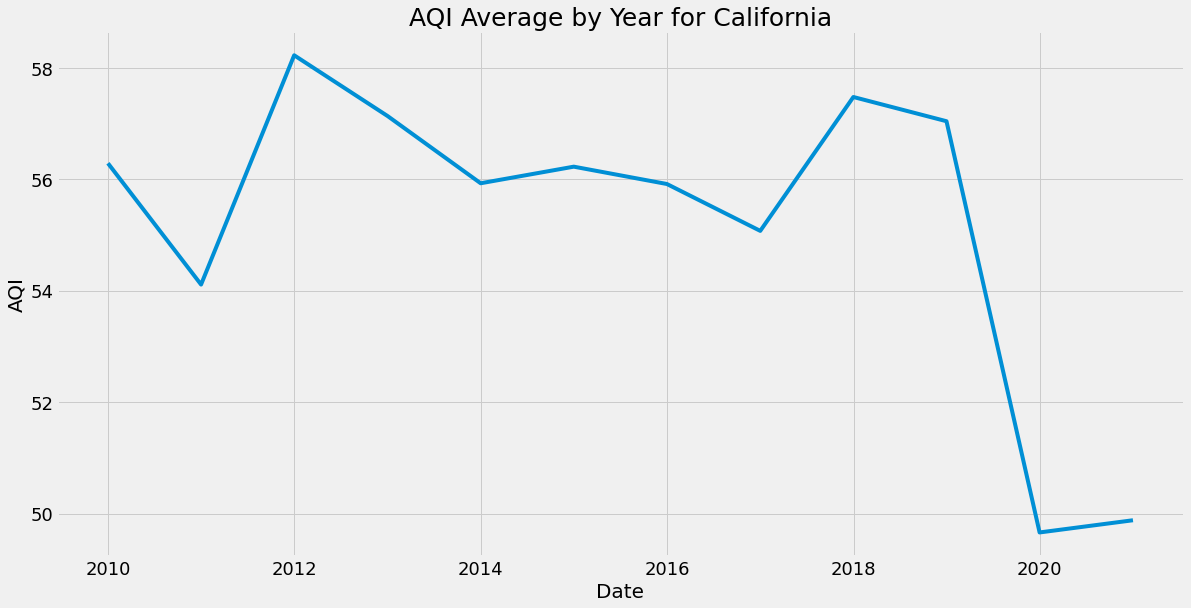

In [7]:
#Plot Style
plt.style.use('fivethirtyeight')
#plot size
plt.figure(figsize=(18,9))

#resampling by year to see any overall trends
plt.plot(df.resample('Y')['aqi'].mean());

#title
plt.title("AQI Average by Year for California", fontsize=25);

# Generate title and labels.
plt.xlabel('Date', fontsize=20);
plt.ylabel('AQI', fontsize=20);

# Enlarge tick marks.
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);


### AQI Trend in California

The graph above is showing the average AQI by year across county in California. There appears to be a long-term decreasing trend in AQI in California. The graph shows average AQI peaking in 2012 and a shap decline in 2020. As the line ends its starting to increasing going into 2021.


Based on research in 2012 California had a series of 7,950 wildfires that burned across the state. The fires burned a total of 869,599 acres (3,519.14 km2), including the massive Rush Fire, which was the tenth-largest wildfire recorded in California in modern times. [Source](https://en.wikipedia.org/wiki/2012_California_wildfires).

In 2020 were the graph displays a sharp decline in AQI could be a reflection of the impact the global pandemic, known as COVID 19, had on the environment. Many people began working from and therefore less transportation pollutions were being released. Although outside research tells us that 5 of the largest state fires occured in 2020 and we see AQI overall drop. This leads us to question if fires have a large impact on AQI or if AQI is less likely to be impacted by wildfires. 

---



<a id="2"></a>

# Monthly Aggregated Average California AQI 

In [8]:


df_california = df.resample('M')['aqi'].mean()

In [9]:
#df_california.head()

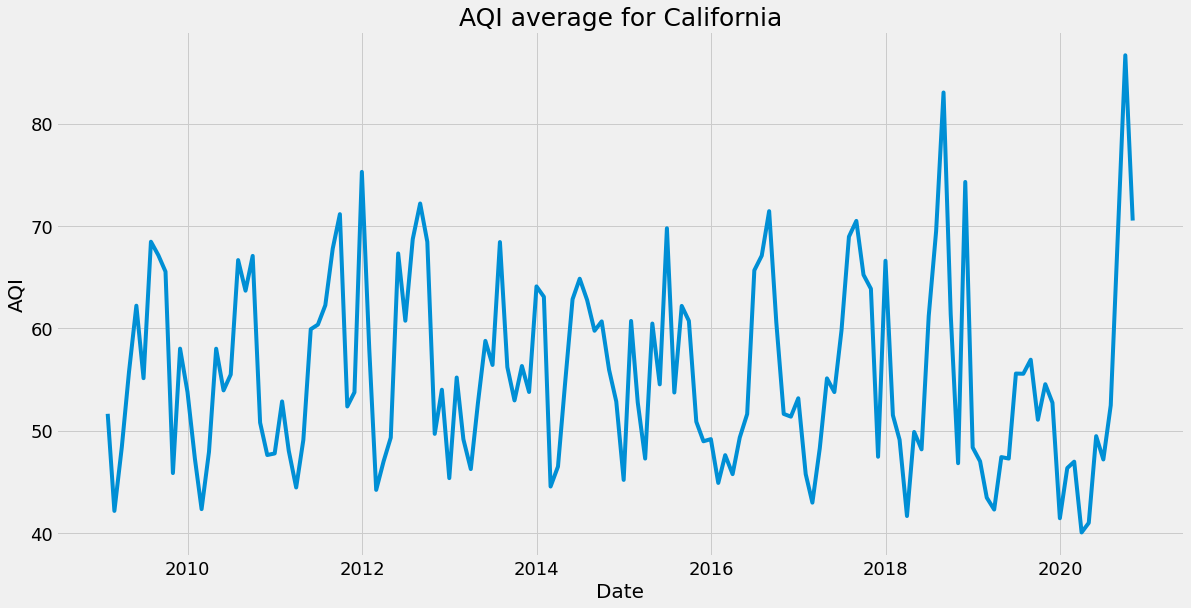

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,9))

plt.plot(df_california);
plt.title("AQI average for California", fontsize=25);

# Generate title and labels.
plt.xlabel('Date', fontsize=20);
plt.ylabel('AQI', fontsize=20);

# Enlarge tick marks.
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);



### Monthly Aggregated AQI across California from 2009 to 2021

In the graph above shows the average AQI aggregated by month across California counties from 2009 to 2021. Contasting against the previous yearly aggregated data, this monthly aggragation shows an overall increasing trend in AQI from 2009 to 2021. In 2009 AQI is hovering right above 50 and in 2021 the trend increases to just about 71. 

---

<a id="3"></a>

# 2019 AQI Trend

In [11]:
df_2019 = df.loc['2019']
df_2019 = df_2019.resample('M')['aqi'].mean()
df_2019

date_index
2019-01-31    47.006277
2019-02-28    43.456627
2019-03-31    42.293492
2019-04-30    47.419189
2019-05-31    47.275371
2019-06-30    55.579961
2019-07-31    55.558267
2019-08-31    56.932276
2019-09-30    51.069987
2019-10-31    54.539506
2019-11-30    52.726296
2019-12-31    41.445394
Freq: M, Name: aqi, dtype: float64

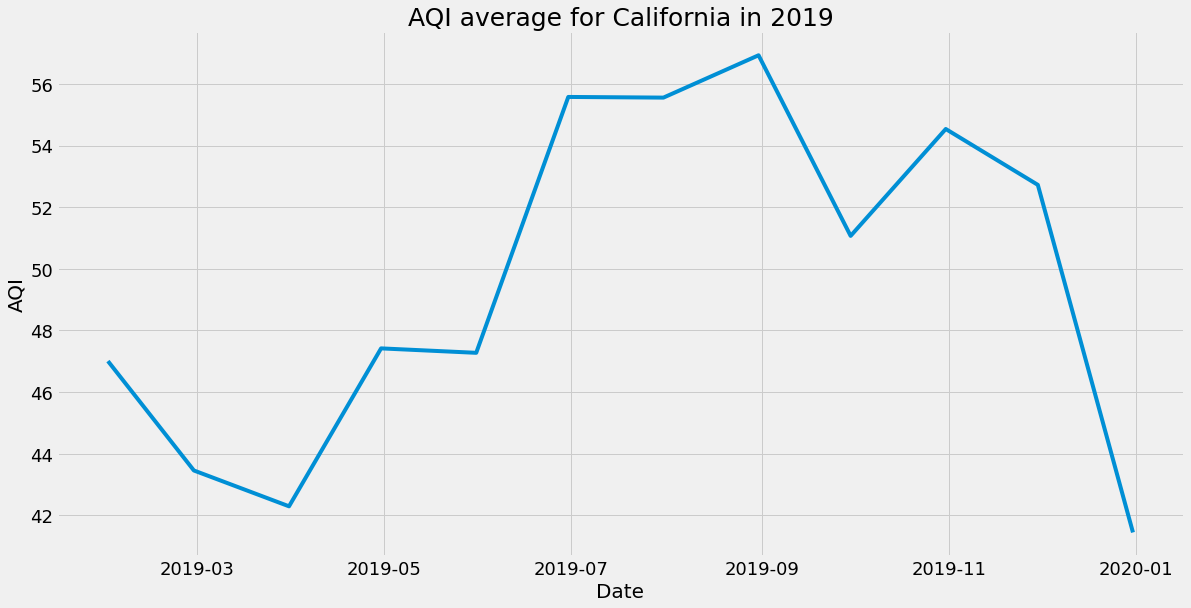

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,9))

plt.plot(df_2019);
plt.title("AQI average for California in 2019", fontsize=25);

# Generate title and labels.
plt.xlabel('Date', fontsize=20);
plt.ylabel('AQI', fontsize=20);

# Enlarge tick marks.
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);


<a id="6"></a>


# 2020 AQI by County

In [21]:
df_2020 = df
df['2020']
df_2020.groupby('county_name')['aqi']

<ipython-input-21-6ad8a4845d78>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020']


In [22]:
df_2020 = df_2020.groupby('county_name')['aqi'].mean()

In [24]:
## Create the map
plt.figure(figsize=(10,8))
map = Basemap(llcrnrlon=-123,llcrnrlat=29,urcrnrlon=-115,urcrnrlat=45,
              projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# Load the shapefile, use 'counties'
map.readshapefile('../input/CaliforniaCounty',name='counties',drawbounds=True)
map.drawcounties()

# Collect the county names from the shapefile attributes
county_names = []
for shape_dict in map.counties_info:
    county_names.append(shape_dict['NAME'])
    
ax = plt.gca()
cmap, norm = mpl.colors.from_levels_and_colors([0,50,100,150,200,300,500], ['green','yellow','orange','red','purple','maroon'])
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for i,county in enumerate(aqiO3Cal.index):
    color = m.to_rgba(aqiO3Cal['O3 AQI'][county])
    seg = map.counties[county_names.index(county)]
    poly = Polygon(seg, facecolor=color,edgecolor=color)
    ax.add_patch(poly)

plt.title('2009-08-31 AQI O3 in California')
plt.show()


NameError: name 'Basemap' is not defined

<Figure size 720x576 with 0 Axes>

In [25]:
import folium as folium

In [26]:
#source: https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
# Read in our map:
my_USA_map = './Datasets/california_counties.json'

In [27]:

map = folium.Map(location=[36, -119], zoom_start=7)

In [28]:
map.choropleth(geo_data=my_USA_map, data=df_2020,
               columns=['county_name', 'aqi'],
               key_on='properties.name',
               fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
               legend_name='aqi')
map

/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [29]:
import plotly.figure_factory as ff

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'California']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Florida'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Population by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

Error importing optional module geopandas
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/_plotly_utils/optional_imports.py", line 30, in get_module
    return import_module(name)
  File "/opt/anaconda3/envs/dsi/lib/python3.8/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/geopandas/__init__.py", line 1, in <module>
    from geopandas.geoseries import GeoSeries  # noqa
  File "/opt/anaconda3

NameError: name 'np' is not defined